In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

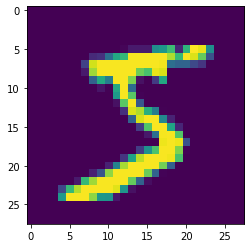

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)

print(X_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [6]:
X_train, X_test = X_train/255.0, X_test/255.0

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2013 - accuracy: 0.9407
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0810 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0515 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0363 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0211 - accuracy: 0.9933
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0165 - accuracy: 0.9945
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0141 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0114 - accuracy: 0.9958
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.011

In [8]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.9791


[0.08827752619981766, 0.9790999889373779]

In [9]:
classification = model.predict(X_test)

In [10]:
np.argmax(classification[0])

7

In [11]:
y_test[0]

7

## Adding Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.99):
            print("Reaches accuracy 99%")
            self.model.stop_training = True
            
callbacks = myCallback()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1857 - accuracy: 0.9445
Epoch 2/10
1210/1875 [==================>...........] - ETA: 1s - loss: 0.0768 - accuracy: 0.9761

## Fashion_MNIST

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
plt.imshow(X_train[0])

In [ ]:
print(X_train[0])
print(y_train[0])

In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss')<0.3):
            print('losses are now below 30%')
            self.model.stop_training = True
            
callbacks = myCallback()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = tf.nn.relu),
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, callbacks=[callbacks])

In [ ]:
classification = model.evaluate(X_test, y_test)

In [ ]:
np.argmax(model.predict(X_test)[0])

In [ ]:
y_test[0]

In [ ]:
plt.imshow(X_test[0])